# Corrosion
## Input
Raw fata
+ moisture

+ temperature

+ corrosion state determined by chloride and carbonation from other modules

## Output
+ icorr/sectionloss with time

+ accumulated/ integral of icorr with time


In [1]:
%matplotlib inline
import numpy as np
from corrosion import Corrosion_Model
import helper_func as hf
import matplotlib.pyplot as plt

# Case study

In [2]:

class Param: pass
raw_pars = Param()

# geometry and age
raw_pars.d = 0.04  # cover depth [m]
raw_pars.t = 3650  # age[day]

# concrete composition
raw_pars.cement_type = 'Type I'
raw_pars.concrete_density = 2400 #kg/m^3
raw_pars.a_c = 2        # aggregate(fine and coarse)/cement ratio
raw_pars.w_c = 0.5      # water/cement ratio
raw_pars.rho_c= 3.1e3   # density of cement particle [kg/m^3]
raw_pars.rho_a= 2600.   # density of aggregate particle(fine and coarse) range 2400-2900 [kg/m^3]


# concrete condition
raw_pars.epsilon = 0.25     # porosity of concrete
raw_pars.theta_water = 0.12 # volumetric water content
raw_pars.T = 273.15+25      # temperature [K]



In [4]:
# initialize and run model
model_corr = Corrosion_Model(raw_pars)
model_corr.run()

# result 
model_corr.icorr

# icorr
print(f"icorr [A/m^2]: {model_corr.icorr.mean()}")
# section loss
model_corr.x_loss_rate
print(f"section loss rate [mm/year]: {model_corr.x_loss_rate.mean()}")

icorr [A/m^2]: 0.006407230310707356
section loss rate [mm/year]: 0.0074203508277001


## Accumulated section loss with the increasing probability of active corrosion

Text(0, 0.5, 'probability of active corrosion')

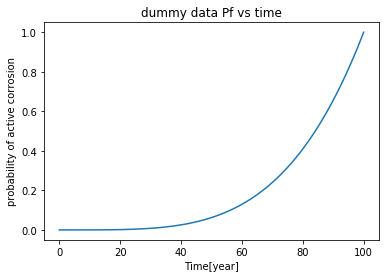

In [5]:
# time steps
t_lis = np.linspace(0, 365*100 , 100)  

# Given probability of active corrosion with time, and the section loss  (determined by membrane, carbonation, chloride module)
# dummy data used for this example
pf_lis = np.linspace(0,1,len(t_lis))**4
plt.plot(t_lis / 365, pf_lis)
plt.title('dummy data Pf vs time')
plt.xlabel('Time[year]')
plt.ylabel('probability of active corrosion')


Text(0.5, 1.0, 'section loss [mm] from 1.0 to 100.0 years')

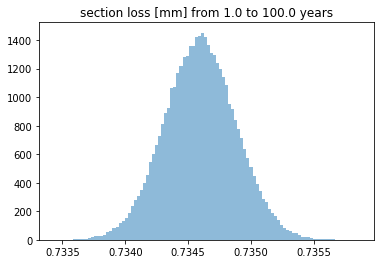

In [7]:
# suppose 
t_lis = np.linspace(365, 365*100, 100)  
model_lis = []
model = model_corr.copy()
for this_t in t_lis:
    model.pars.t = this_t
    model.run()
    model_lis.append(model.copy())

section_loss_t = np.array([this_model.x_loss_rate for this_model in model_lis])

hf.Hist_custom(hf.sample_integral(section_loss_t,t_lis/365))  # section loss [mm/year] t_lis [day]
plt.title(f'section loss [mm] from {(t_lis/365).min()} to {(t_lis/365).max()} years')

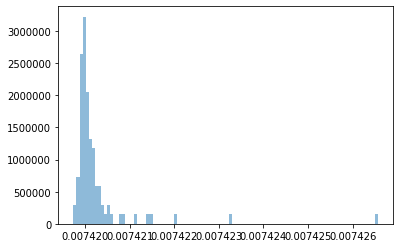

In [48]:
hf.Hist_custom(section_loss_t.mean(axis=1))

# construction zone

In [95]:
# Calibrate

theta_water_input = np.linspace(0.05,0.30,20)
T = np.linspace(-40,40,20)
x1 = theta_water_input
y1 = T

nx, ny = 30, 30
xx, yy = np.meshgrid(np.linspace(x1.min(), x1.max(), nx), 
                     np.linspace(y1.min(), y1.max(), ny))

zz = icorr_f(xx,yy, 2.4,4e-2)  # [TODO] icorr_f(pars), iterate through all xx and yy

# Plot
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xx, yy-273.15, zz*100,alpha=1,cmap='gray',linewidth=0)
fig.colorbar(surf,shrink=0.5)

# ax.scatter(theta_water, np.ones(theta_water.size)*25, theta_water*5.24,
#            c=theta_water*5.24,cmap='gray',marker='.',s=100,
#            alpha = 1,
#         label=r'Room temp model $i_{corr}=5.25\cdot {\theta}_w [\mu A/cm^2]$')


ax.set_xlabel('Volumetric water content')
ax.set_ylabel(u'Temperature (℃)')

ax.set_zlabel('icorr$[\mu A/cm^2]$')
plt.tight_layout()



TypeError: icorr_f() takes 1 positional argument but 4 were given